O notebook a seguir é o projeto de MLP da cadeira de Sistemas Inteligentes. Para sua execução, irei usar a biblioteca MLP do SKLearn, e farei uma análise preliminar dos dados visando criar o melhor modelo possível.

Grupo:

- Gabriel Toscano de Brito Oliveira (gtbo)

- Marcos Gabriel Pereira da Paz (mgpp)

- Sérgio de Souza Leão Pessoa (sslp)


# O dataset

O dataset a ser usado é o dados de faculdades dos EUA, e a ideia será agrupar todas essas instuições em clusters ótimos usando o algoritmo KMeans.

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [5]:
df = pd.read_csv('College.csv')
df.shape

(777, 19)

In [6]:
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


O dataset já tem um bom nível de preprocessamento, com quase todas as colunas númericas exceto pela "Private", que indica se a faculdade é pública ou privada. Para lidar com isso, irei usar uma substituição por 1 ou 0:

In [7]:
df.Private.value_counts()

Yes    565
No     212
Name: Private, dtype: int64

In [9]:
df.Private = df.Private.replace({'Yes': 1, 'No': 0})

Irei fazer uma breve análise de correlação, visando verificar quais variáveis têm valores parecidos e podem explicar outras. Isso pode ser importante para visualização dos clusters.

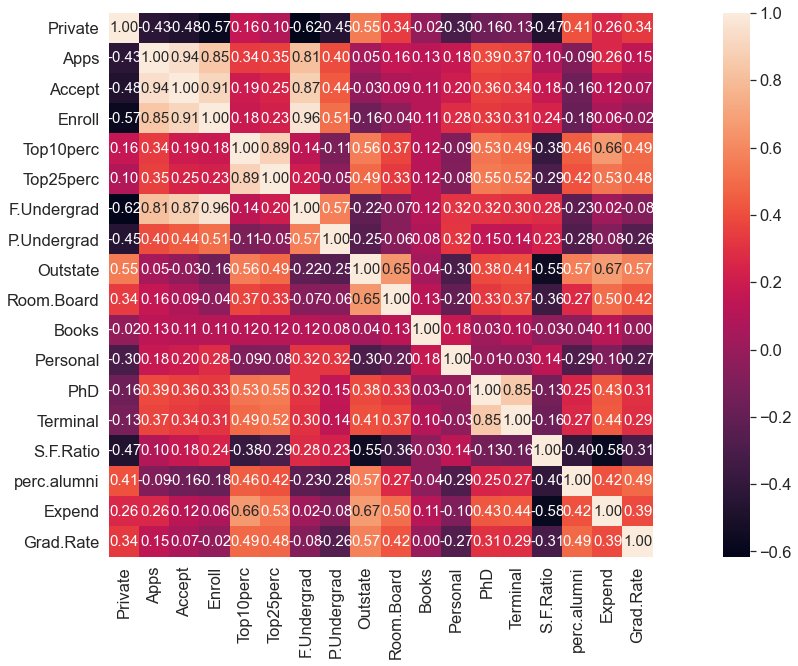

In [12]:
int_cols = df.columns.values[1:]

#correlation
plt.figure(figsize=(25,10))
cm = np.corrcoef(df[int_cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':15}, yticklabels=int_cols, xticklabels=int_cols)
plt.show()

Há algumas varáveis com forte correlação, tanto negativa quanto positiva. Algumas são conclusões bem óbvias, como o número de matrículas ter alta correlação com número de aplicações.

# O modelo

Irei usar o KMeans, da biblioteca SKLearn. Para isso, o primeiro passo é selecionar as colunas de serão features do modelo, e depois deixá-las na mesma escala.

In [13]:
X = df[int_cols]

In [15]:
sc = preprocessing.StandardScaler()
X_std = sc.fit_transform(X)
X_std

array([[ 6.12553050e-01, -3.46881819e-01, -3.21205453e-01, ...,
        -8.67574189e-01, -5.01910084e-01, -3.18251941e-01],
       [ 6.12553050e-01, -2.10884040e-01, -3.87029908e-02, ...,
        -5.44572203e-01,  1.66109850e-01, -5.51261842e-01],
       [ 6.12553050e-01, -4.06865631e-01, -3.76317928e-01, ...,
         5.85934748e-01, -1.77289956e-01, -6.67766793e-01],
       ...,
       [ 6.12553050e-01, -2.33895071e-01, -4.23771558e-02, ...,
        -2.21570217e-01, -2.56241250e-01, -9.59029170e-01],
       [ 6.12553050e-01,  1.99171118e+00,  1.77256262e-01, ...,
         2.12019418e+00,  5.88797079e+00,  1.95359460e+00],
       [ 6.12553050e-01, -3.26765760e-03, -6.68715889e-02, ...,
         4.24433755e-01, -9.87115613e-01,  1.95359460e+00]])

Agora temos os dados prontos para aplicar o modelo de KMeans. Irei usar o "Elbow Method" para achar, primeiramente, o número ótimo de clusters. Esse método consiste em calcular o valor do erro médio quadrático para valores diferentes de clusters, o ótimo será aquele que ficará na "ponta do cotovelo" do gráfico, isto é, será o ponto de inflexão da curva.

In [19]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_std)
    distortions.append(kmeanModel.inertia_)

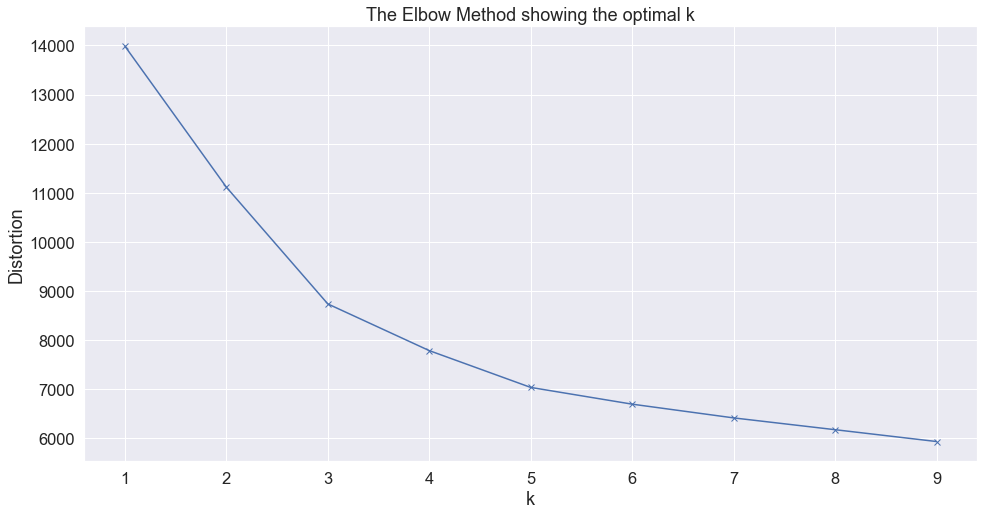

In [20]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Para esse caso, podemos dizer que o número ótimo é para k=3. O ponto k=5 também é bastante interessante.

In [21]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_std)

KMeans(n_clusters=3, random_state=0)

Agora, para facilitar a visualização, irei adicionar uma coluna com cada cluster no dataset inicial.

In [23]:
df['cluster'] = kmeans.predict(X_std)
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,cluster
0,Abilene Christian University,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,0
1,Adelphi University,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,0
2,Adrian College,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,0
3,Agnes Scott College,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,2
4,Alaska Pacific University,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,0


Podemos fazer algumas visualizações interessantes para analisar os resultados. Como exemplo, irei plotar o número de universidades privadas em cada cluster.

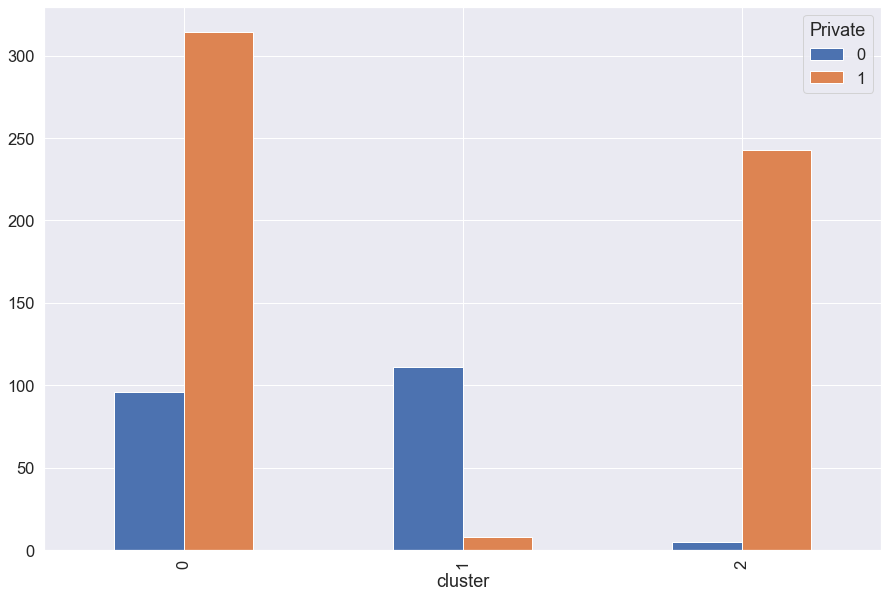

In [57]:
df.groupby(['cluster']).Private.value_counts().unstack().plot(kind='bar', figsize=(15,10))
plt.show()

O cluster 1 abriga em grande maioria as públicas, enquanto o 2 abriga em grande maioria as privadas. Já o 0 é mais equilibrado, o que indica que as universidades deles são parecidas apesar de ter uma forma de administração diferente.